## Homework: 02

> Note: sometimes your answer doesn't match one of  
> the options exactly. That's fine.  
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [1]:
# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Define the link to the data.
POSTFIX = '../data/laptops.csv'

In [3]:
df_use = pd.read_csv(POSTFIX)

In [4]:
# Prepare the dataset.
df_use.columns = df_use.columns.str.lower().str.replace(' ', '_')

In [5]:
# Subset the dataset.
col_use = ['ram', 'storage', 'screen', 'final_price']

df = df_use[col_use]

### EDA

* Look at the `final_price` variable. Does it have a long tail? 

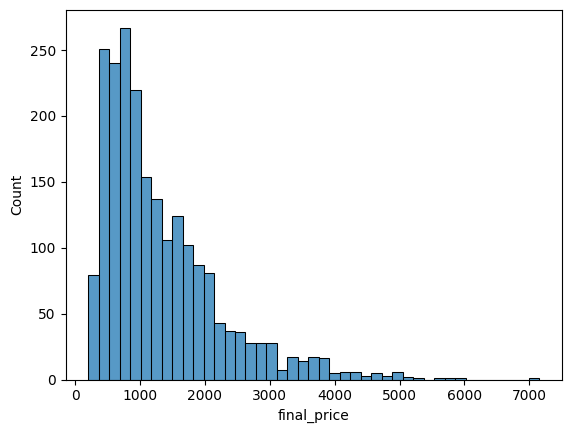

In [6]:
# Plot a histogram of the final_price.
sns.histplot(df['final_price']);

Yes the `final_price` has a long tail.

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [7]:
# Check for missing values in df
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

#### Question 01 Answer: `'screen'`

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [8]:
# Find the median for variable 'ram'.
df['ram'].median()

16.0

#### Question 02 Answer: `16`

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [9]:
# Find the lengths of n_val, n_test, n_train.
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
# Shuffle the indices.
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [11]:
# Derive df_train, df_val and df_test.
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [12]:
# Show the lengths of df_train, df_val and df_test.
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [13]:
# Drop the indices.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# Derive y_train, y_val and y_test.
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [15]:
# Delete final_price from df_train, df_val and df_test.
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [16]:
# Define train_linear function.
def train_linear(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [17]:
# Define fill_with_zero function.
def fill_with_zero(df):
    df = df.fillna(0)
    X = df.values
    return X

In [18]:
# Define fill_with_mean function (Using only training data).
mean_values = df_train.mean()
mean_screen = mean_values['screen']

def fill_with_mean(df):
    df = df.fillna(mean_screen)
    X = df.values
    return X

In [19]:
# Defime the rmse_value function.
def rmse_value(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse_error = np.sqrt(mse)
    return rmse_error

In [20]:
# Find the RMSE for fill_with_zero.
X_train = fill_with_zero(df_train)
w0, w = train_linear(X_train, y_train)
X_val = fill_with_zero(df_val)
y_pred = w0 + X_val.dot(w)
rmse_val = round(rmse_value(y_val, y_pred), 5)
rmse_val

597.36356

In [21]:
# Find the RMSE for fill_with_mean.
X_train = fill_with_mean(df_train)
w0, w = train_linear(X_train, y_train)
X_val = fill_with_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse_val = round(rmse_value(y_val, y_pred), 5)
rmse_val

600.26503

#### Question 03 Answer: `With 0`

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [22]:
# Define train_regularized function.
def train_regularized(X, y, r):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
#  Train a regularized linear regression with different r.
for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    X_train = fill_with_zero(df_train)
    w0, w = train_regularized(X_train, y_train, r=i)
    
    X_val = fill_with_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse_value(y_val, y_pred)
    
    print(f"regularization:{i}, bias:{w0}, RMSE:{score:.2f}")

regularization:0, bias:676.8954853009992, RMSE:597.36
regularization:0.01, bias:676.2736817211679, RMSE:597.36
regularization:0.1, bias:670.7284836318768, RMSE:597.35
regularization:1, bias:619.9030834112974, RMSE:597.21
regularization:5, bias:463.77716971451275, RMSE:597.01
regularization:10, bias:352.7971336770062, RMSE:597.06
regularization:100, bias:66.92071440183614, RMSE:597.90


#### Question 04 Answer: `10`

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [24]:
#  Train a linear regression with different seeds.
the_score = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    
    df_train = df_train.drop('final_price', axis=1)
    df_val = df_val.drop('final_price', axis=1)
    
    X_train = fill_with_zero(df_train)
    w0, w = train_linear(X_train, y_train)

    X_val = fill_with_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse_value(y_val, y_pred)
    the_score.append(rmse_val)

In [25]:
# Find the standard deviation of the score.
the_sd = round(np.std(the_score), 3)
the_sd

29.176

#### Question 05 Answer: `29.176`

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [26]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

# combine the train and validation dataset
final_df = pd.concat([df_train, df_val]).reset_index(drop=True)

y_final = final_df['final_price']
y_test = df_test.final_price.values
    
train_df = final_df.drop('final_price', axis=1)
test_df = df_test.drop('final_price', axis=1)
    
X_train = fill_with_zero(train_df)
w0, w = train_regularized(X_train, y_final, r=0.001)

X_test = fill_with_zero(test_df)
y_pred = w0 + X_test.dot(w)
rmse_val = round(rmse_value(y_test, y_pred), 2)
rmse_val

608.61

#### Question 06 Answer: `608.60`